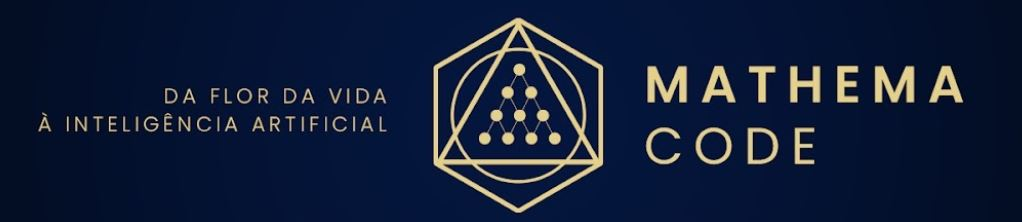

<font size=7>Aula 6 - Escala Razão</font>

# Escalas de medida métrica

## Escalas intervalares e razão


**As escalas intervalares e escalas de razão (ambas métricas) fornecem o mais alto nível de precisão de medida, permitindo que quase todas as operações matemáticas sejam executadas.** Essas duas escalas têm unidades constantes de medida, e, portanto, diferenças entre quaisquer dois pontos adjacentes em qualquer parte da escala são iguais.


A única diferença real entre as escalas intervalares e escalas de razão é que **as primeiras têm um ponto zero natural, enquanto as escalas de razão incluem um ponto de zero absoluto.**

# Escala Razão

1. Exemplos:
 - Comprimento
 - Peso
 - Idade

2. Ponto zero é fixo

3. Medições:
 - Média
 - Desvio Padrão
 - Regressão

4. Gráficos:
 - Linhas
 - Histograma
 - Boxplot
 - Dispersão

In [ ]:
# importar o pandas
import pandas as pd
pd.options.display.max_columns = None

In [ ]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')

[Dataset de Suicídios](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [ ]:
# carregar a base de suicídios `datasets/mm.csv`
suicidios = pd.read_csv('datasets/mm.csv')
suicidios.head()

**O que é cada linha da tabela?**

Número de suicídios de uma faixa-etária, em um ano e em um país

In [ ]:
# mostrar as colunas da base de suicídios
suicidios.info()

In [ ]:
# valores únicos e 5 valores mais frequentes de cada coluna
n_unicos = suicidios.nunique()
unicos = suicidios.apply(lambda x: x.value_counts().head().index)
df_temp = pd.concat([n_unicos, unicos], axis=1)
df_temp.columns = ['n_unicos', 'unicos']
df_temp

In [ ]:
# Estatística descritiva das variáveis objeto
suicidios

In [ ]:
# Estatística descritiva das variáveis numérica
suicidios

In [ ]:
# Criar tabela com número de suicídios ('suicides/100k pop') 
# de cada país por faixa etária ('age'), por sexo ('sex') ao longo dos anos ('year')
suicidios.pivot_table(
    values=,
    index=,
    columns=
    aggfunc=
)

In [ ]:
# Criar tabela com número de suicídios de cada país por faixa etária por sexo ao longo dos anos 
suicidios_por_ano = suicidios.pivot_table(
    values='suicides/100k pop',
    index='year',
    columns='country',
    aggfunc='sum'
)
suicidios_por_ano

In [ ]:
# Qual o ano mais recente com menos nulos?
suicidios_por_ano

In [ ]:
# cria série com nro de suicídios em 2014
suicidios_2014 = suicidios_por_ano.T[2014]
suicidios_2014

In [ ]:
# plota gráfico de barras horizontais de suicídios por ano
suicidios_2014

In [ ]:
# obtém os top 10 países com mais suicídios em um determinado ano
paises_top_10 = suicidios_2014
paises_top_10

In [ ]:
# plotar gráfico de linhas dos suicídios ao longo dos anos dos países top 10
suicidios_por_ano

In [ ]:
# plotando cada um dos top10 individualmente
for p in paises_top_10:
    suicidios_por_ano[p].plot(title=p, figsize=(8,2))
    plt.show()

In [ ]:
# cria dataframe com dos dados de IDH('HDI for year') e PIB per capta ('gdp_per_capita ($)')
df_dados_2014 = suicidios.set_index('country').query('year == 2014')[['HDI for year', 'gdp_per_capita ($)']].drop_duplicates()
df_dados_2014

In [ ]:
# observando a série com o número de suicídios em 2014
suicidios_2014

In [ ]:
# adiciona coluna de suicídios em 2014
# PS.: só é possível adicionar a coluna porque os "index" é igual ao do dataframe
df_dados_2014['suicides/100k pop'] = suicidios_2014
df_dados_2014

In [ ]:
# ordena por número de suicídios ('suicides/100k pop')
df_dados_2014.sort_values('suicides/100k pop', ascending=False, inplace=True)
df_dados_2014

In [ ]:
# filtrar e mostrar apenas o Brasil(Brazil) 
df_dados_2014[df_dados_2014.index == 'Brazil']

# Exemplo de Frequencia para Percentual do Benford
- Na Base de Suicidio
- Hypótese:
  - A Frequencia segue de acordo com Benford?
  
[Wikipédia](https://pt.wikipedia.org/wiki/Lei_de_Benford)  

## Benford

In [ ]:
import math

In [ ]:
# criar a régua do Benford
regua_benford = 
regua_benford

In [ ]:
# transformar a regua_benford num dataframe
df_regua_benford = 

In [ ]:
# extrair o primeiro dígito de uma coluna numérica ('suicides/100k pop')
coluna_1dig = 
coluna_1dig

In [ ]:
# remover dígito '0'
coluna_1dig = 
coluna_1dig

In [ ]:
# mostrar distribuição do primeiro dígito
freq_1dig = 
freq_1dig

In [ ]:
# criar uma função que recebe uma coluna,
# filtra os valores zeros,
# extrai o primeiro dígito de cada valor e
# retorna as frequências relativas de cada primeiro dígito
def frequencia_coluna(coluna):    
    coluna = coluna.dropna().astype(str).str[0]
    coluna = coluna[coluna != '0']
    freq_dig = coluna.value_counts(normalize = True)
    return freq_dig

In [ ]:
# testa função frequencia_coluna 
# em df_dados_2014['suicides/100k pop']
frequencia_coluna(df_dados_2014['suicides/100k pop'])

In [ ]:
# criar função que recebe uma coluna,
# criar um dataframe que compara freq. real e freq. ideal de Benford e
# plotar um gráfico de barras pareadas
def benford(coluna):
    regua = [(str(digito), math.log10(1 + 1/digito)) for digito in range(1, 10)]
    df_comparacao = pd.DataFrame(regua).set_index(0)
    df_comparacao.columns = ["esperado"]
    df_comparacao["real"] = frequencia_coluna(coluna)
        
    x2 = (df_comparacao['esperado'] - df_comparacao['real']).pow(2) / df_comparacao['esperado'] 
    df_comparacao = df_comparacao * 100
    df_comparacao.plot.bar(xlabel='dígitos', ylabel='distribuição da frequência')
    plt.suptitle(coluna.name, y=1.01)
    plt.title(f"Qui-Quadrado = {round(x2.sum(), 2)}", fontsize=12)
    
    df_comparacao['x2'] = (x2).round(2)
    
    return df_comparacao

In [ ]:
# traz os n primeiros números da sequência de Fibonacci
def recur_fibo(n):
    a = 0
    b = 1
    r = []
    for i in range(n):
        r.append(a)
        a, b = b, a + b
    return r
recur_fibo(10)

In [ ]:
# cria 1000 números Fibonacci em uma série
# e aplica a função benford
fib = pd.Series(recur_fibo(1000), name='Fibonacci')
benford(fib)

In [ ]:
# aplica Benford a uma sequência de números de 0 a 99999
intervalo = pd.Series(range(0,10000))
benford(intervalo)

In [ ]:
# aplicar a função de benford em df_dados_2014['suicides/100k pop']
benford(df_dados_2014['suicides/100k pop'])

In [ ]:
for i in range(15):
    benford(suicidios_por_ano.T[2000 + i]);

In [ ]:
candidatos = pd.read_csv('./datasets/candidatos_deputados_2014_final.csv', encoding='latin-1')
candidatos

In [ ]:
benford(candidatos['VALOR_BEM']) 

In [ ]:
benford(candidatos['VALOR_RECEITA']) 

# Regressão Linear

**Regressão linear** é o processo de encontrar a equação de uma reta por meio dos dados (pontos em um diagrama de dispersão).

De posse da equação da reta, é possível fazer previsões.

In [ ]:
from IPython.display import clear_output
from time import sleep
from random import random

In [ ]:
# cria uma base de dados de testes
x = list(range(1, 11))
y = [i + (1 if random() >.5 else -1) * 2 * random() for i in x]
df_teste = pd.Series(x, name='x').to_frame()
df_teste['y'] = y

# plota os dados da coluna x e os y
df_teste.plot.scatter(x='x', y='y')
df_teste

## Regressão Linear com "Gradiente Descendente Caseiro"

In [ ]:
# Inicializa variáveis para rodar modelo teste
# gradiente descendente
erros = []
emes = []
# ax + b
a = 0 
b = 0
t = .01 # taxa de variação ao "a"

In [ ]:
# varia "um pouquinho" o valor do parâmetro "a"
#de modo a encontrar o valor que retorna o menor erro

manual = False
#manual = True
while len(erros) < 2 or  abs(erros[0] - erros[1]) > .01:    
    # plota dados da tabela
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
    df_teste.plot.scatter(x='x', y='y', ax=ax1)

    # faz previsão usando os "a" e "b"     
    df_teste['prev'] = df_teste['x'] * a + b
    # calcula o quadrado do erro
    df_teste['erro'] =  (df_teste['prev'] - df_teste['y']).pow(2)
    # plota a reta resultante da previsão
    df_teste.plot(x='x', y='prev', color='r', ax=ax1)
    
    # calula a mse (erro médio quadrado)
    mse = ((df_teste['erro']/df_teste.shape[0]).sum())
    
    # calcula o erro atual do modelo
    j = (df_teste['prev'] - df_teste['y']).sum() / df_teste.shape[0]
            
    # salva o erro e valor do "a"
    if len(erros) == 0 or mse != erros[0]:
        erros.insert(0, mse)
        emes.insert(0, a)
        
    # altera o "a" um pouquinho (1/3 do erro)
    a = a - j / 3     
    #a = a - j * t
    
    # plota o valor do erro em relação ao valor de "a"
    ax2.scatter(emes, erros)
    ax2.set_xlabel('a')
    ax2.set_ylabel('erro')
    
    # limpa a saída da célula
    clear_output()    
    # imprime os erros
    if len(erros) > 1:
        print('Variação do Erro: ', erros[0] - erros[1])
    print('Ultimos RMSE:\n', erros[:3])    
    
    # mostra a plotagem
    plt.show()   
    
    # aguarda 300ms
    sleep(.3)
    
    if manual:
        break
    

In [ ]:
# importa a classe de regressão linear do pacote sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Fazendo a previsão usando o modelo de regressão
# do pacote Scikit-Learn
modelo = LinearRegression()
modelo.fit(X=df_teste[['x']], y=df_teste['y'])
df_teste['prev_sk'] = modelo.predict(df_teste[['x']])

In [ ]:
# mostra valores dos coeficiente encontrados
# pelo modelo de gradiente descendente caseiro
a , b

In [ ]:
# mostra valores dos coeficiente encontrados
# pelo modelo do Scikit-Learn
modelo.coef_, modelo.intercept_

In [ ]:
# plotando os dados e as duas retas de predições
# com o gradiente descendente caseiro
# com o modelo do Scikit-learn
ax = df_teste.plot.scatter(x='x', y='y')
df_teste.plot(x='x', y='prev', color='r', ax=ax, alpha=.5)
df_teste.plot(x='x', y='prev_sk', color='b', ax=ax, alpha=.5)

## Regressão Univariada


In [ ]:
# mostra o dataframe de suicidios por ano
suicidios_por_ano

In [ ]:
# Instacia o modelo de regessão linear
modelo = LinearRegression()

In [ ]:
df_model = suicidios_por_ano.reset_index()[['year', 'Lithuania']].dropna()

In [ ]:
X = df_model[['year']]
y = df_model[['Lithuania']]

In [ ]:
# Treina o modelo (.fit()) de regressão linear
# com os dados da coluna CODIGO_GRAU_INSTRUCAO como entrada (X)
# e a coluna VALOR_BEM como saída (y)
modelo.fit(X=X, y=y)

In [ ]:
# executa o modelo de regresão linear treinado para prever o valor de bens
# de acordo com cada grau de instrução (x)
df_model['PRED'] = modelo.predict(X)
df_model

In [ ]:
# calcula o erro
df_model['ERRO'] = df_model['Lithuania'] - df_model['PRED']
df_model

In [ ]:
# plota o resultado da regressão linear
ax = df_model.plot.scatter(x='year', y='Lithuania', s=100, figsize=[9,4])
df_model.plot(x='year', y='PRED', c='r', ax=ax);

In [ ]:
# do pacote Scikit-Learn, subpacote metrics, 
# importa a função de cálculo do MAE(Erro Médio Absoluto)
from sklearn.metrics import mean_absolute_error

In [ ]:
# calcula o Erro Médio Absoluto usando o valor real
# e o valor predito pelo modelo
modelo_mae = mean_absolute_error(df_model['Lithuania'], df_model['PRED'])
modelo_mae

FIM